# Importing Necessary Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [3]:
img = image.load_img(r"C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\training\infacted\IMG_1902.JPG")


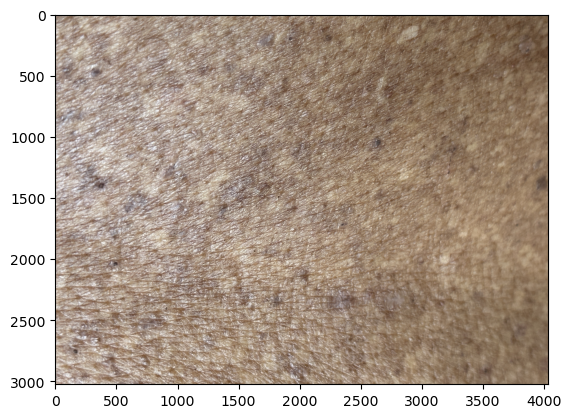

In [4]:
plt.imshow(img)

# Image Matrix

In [6]:
cv2.imread(r"C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\training\infacted\IMG_1902.JPG")

array([[[226, 238, 250],
        [224, 236, 248],
        [215, 227, 239],
        ...,
        [119, 129, 146],
        [118, 128, 145],
        [113, 123, 140]],

       [[225, 237, 249],
        [222, 234, 246],
        [211, 223, 235],
        ...,
        [123, 133, 150],
        [122, 132, 149],
        [117, 127, 144]],

       [[219, 231, 243],
        [215, 227, 239],
        [201, 214, 228],
        ...,
        [129, 139, 156],
        [127, 137, 154],
        [121, 131, 148]],

       ...,

       [[112, 135, 157],
        [110, 133, 155],
        [107, 130, 152],
        ...,
        [ 75,  99, 121],
        [ 76, 100, 122],
        [ 74,  98, 120]],

       [[113, 136, 158],
        [111, 134, 156],
        [108, 131, 153],
        ...,
        [ 76, 101, 121],
        [ 76, 101, 121],
        [ 74,  99, 119]],

       [[114, 137, 159],
        [111, 134, 156],
        [108, 131, 153],
        ...,
        [ 76, 101, 121],
        [ 76, 101, 121],
        [ 74,  99, 119]]

In [7]:
cv2.imread(r"C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\training\infacted\IMG_1902.JPG").shape

(4032, 3024, 3)

# Rescalling Image

In [9]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

# For Train Dataset

In [11]:
train_dataset = train.flow_from_directory(r"C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\training/",
                                         target_size =(200,200),
                                         batch_size = 32,
                                         class_mode = "binary")



Found 1287 images belonging to 2 classes.


# For Validation Dataset

In [13]:
validation_dataset = train.flow_from_directory(r"C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\validation/",
                                         target_size =(200,200),
                                         batch_size = 32,
                                         class_mode = "binary")

Found 1287 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'infacted': 0, 'not_infacted': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

# Convolutional Neural Network (CNN)

MaxPool

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(200, 200, 3)),  

    tf.keras.layers.Conv2D(16, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [19]:
from tensorflow.keras.optimizers import RMSprop

In [20]:
model.compile(loss = "binary_crossentropy",
             optimizer= RMSprop(learning_rate = 0.001),
             metrics= ["accuracy"]
             )

# Fitting Model

In [22]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 40,
                      epochs =25,
                      validation_data = validation_dataset
                     )

C:\Users\Nafesh Anam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 266s 7s/step - accuracy: 0.5509 - loss: 1.5234 - val_accuracy: 0.5758 - val_loss: 0.6573
Epoch 2/25
 1/40 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - accuracy: 0.5938 - loss: 0.6572

C:\Users\Nafesh Anam\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


40/40 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.5938 - loss: 0.6572 - val_accuracy: 0.5758 - val_loss: 0.6426
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 259s 7s/step - accuracy: 0.6000 - loss: 0.6670 - val_accuracy: 0.7793 - val_loss: 0.5885
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.8438 - loss: 0.5730 - val_accuracy: 0.7296 - val_loss: 0.5660
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 259s 7s/step - accuracy: 0.6767 - loss: 0.6090 - val_accuracy: 0.6876 - val_loss: 0.5704
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.7188 - loss: 0.5381 - val_accuracy: 0.7918 - val_loss: 0.4919
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 258s 7s/step - accuracy: 0.7567 - loss: 0.5315 - val_accuracy: 0.7568 - val_loss: 0.5003
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8750 - loss: 0.4218 - val_accuracy: 0.8065 - val_loss: 0.4513
Epoch 9/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 263s 7s/step - accuracy: 0.7643 - loss: 0.5299 - val_accuracy: 0.8205 - val_loss: 0.

test

In [25]:
train_dataset.class_indices

{'infacted': 0, 'not_infacted': 1}

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

dir_path = r"C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\testing"

# Walk through all subdirectories and files
for root, dirs, files in os.walk(dir_path):
    for fname in files:
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, fname)
            try:
                # Load and preprocess image
                img = load_img(file_path, target_size=(200, 200))
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = x / 255.0
                
                # Make prediction
                val = model.predict(x)[0][0]
                confidence = round(val * 100, 2)

                # Determine label and color

                if val < 0.5:
                    label = "Infected"
                    
                else:
                    label = "Not Infected"
                    
               


                # Display the image with prediction
                plt.figure(figsize=(5, 5))
                plt.imshow(img)
                plt.title(label, color=color, fontsize=14, fontweight='bold')
                plt.axis('off')
                plt.show()

            except Exception as e:
                print(f"Failed to process {file_path}: {e}")



# test


In [71]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\testing',
    image_size=(200, 200),
    batch_size=20,
    shuffle=False  # Important for evaluation
)


Found 1287 files belonging to 2 classes.


Evaluate model

In [73]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.9356 - loss: 11.0646
Test Loss: 26.4587
Test Accuracy: 89.04%


Make predictions:

In [76]:
y_pred_probs = model.predict(test_dataset)
y_pred = (y_pred_probs > 0.5).astype("int32")


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step


Extract true labels:

In [79]:
y_true = []
for _, labels in test_dataset:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)

classification report and confusion matrix:

Classification Report:
              precision    recall  f1-score   support

    Infected       0.87      0.95      0.91       741
Not Infected       0.92      0.81      0.86       546

    accuracy                           0.89      1287
   macro avg       0.90      0.88      0.89      1287
weighted avg       0.89      0.89      0.89      1287



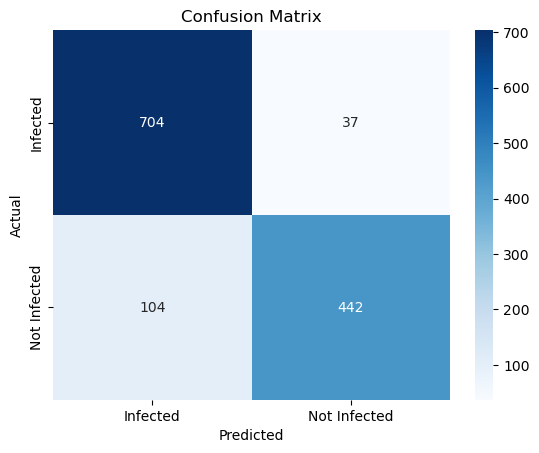

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Infected", "Not Infected"]))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Infected", "Not Infected"],
            yticklabels=["Infected", "Not Infected"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Matrices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━

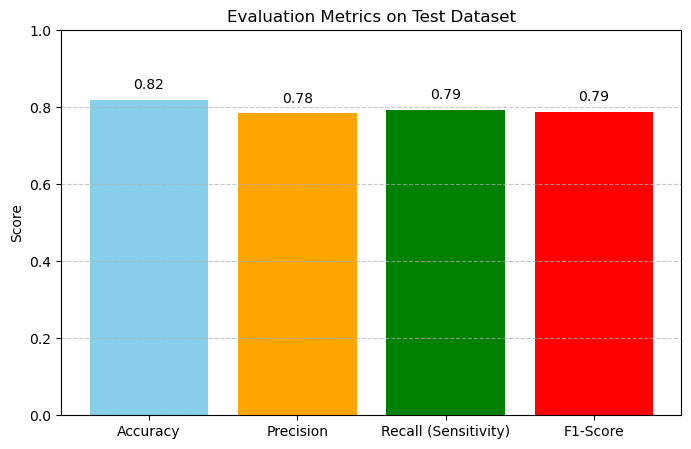

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  y_pred
y_pred = []

for images, _ in test_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int)  
    y_pred.extend(preds)

y_pred = np.array(y_pred).flatten()
y_true = np.array(y_true).flatten()

# Calculate Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print Results
print(f" Accuracy:  {accuracy * 100:.2f}%")
print(f" Precision: {precision * 100:.2f}%")
print(f" Recall:    {recall * 100:.2f}%")
print(f" F1-score:  {f1 * 100:.2f}%")


# Plotting
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score']

plt.figure(figsize=(8, 5))
bars = plt.bar(metric_names, metrics, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics on Test Dataset')
plt.ylabel('Score')

# Annotate bars with values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Using ResNet18:

In [117]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(train_dataset, 
          validation_data=validation_dataset, 
          epochs=25, 
          steps_per_epoch=40)


# Summary of the model
model_resnet.summary()


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.5099 - loss: 1.0793 - val_accuracy: 0.5758 - val_loss: 0.6931
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.5000 - loss: 0.6943 - val_accuracy: 0.5758 - val_loss: 0.6931
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 314s 8s/step - accuracy: 0.5673 - loss: 0.6934 - val_accuracy: 0.5758 - val_loss: 0.6930
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.6562 - loss: 0.6929 - val_accuracy: 0.5758 - val_loss: 0.6930
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 312s 8s/step - accuracy: 0.5694 - loss: 0.6932 - val_accuracy: 0.5758 - val_loss: 0.6929
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.5625 - loss: 0.6929 - val_accuracy: 0.5758 - val_loss: 0.6929
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 314s 8s/step - accuracy: 0.5773 - loss: 0.6931 - val_accuracy: 0.5758 - val_loss: 0.6927
Epoch 8/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 157s 4s/step - accuracy: 0.5938 - loss: 0.6926 - val_accuracy: 0.5758 - v

NameError: name 'model_resnet' is not defined

Evaluate ResNet18 Model

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np


y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = resnet_model.predict(images)
    y_pred.extend(predictions.flatten())
    y_true.extend(labels)

#Binarize predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
y_true = np.array(y_true)

#Compute metrics
accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

# Display results
print("Evaluation Metrics for ResNet18 Model:")
print(f" Accuracy     : {accuracy:.4f}")
print(f" Precision    : {precision:.4f}")
print(f" Recall       : {recall:.4f}")
print(f" F1-Score     : {f1:.4f}")
print("\n Detailed Report:\n")
print(classification_report(y_true, y_pred_binary, target_names=["Not Infected", "Infected"]))


NameError: name 'resnet_model' is not defined

Load Pretrained ResNet18 & Modify for Binary Classification

In [122]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(200, 200, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Adding custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification

resnet_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

resnet_model.summary()


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 206, 206, 3)       │               0 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 100, 100, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 100, 100, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 100, 100, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 102, 102, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 50, 50, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 50, 50, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 50, 50, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Train Resnet

In [125]:
resnet_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)


Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 334s 8s/step - accuracy: 0.5400 - loss: 0.6864 - val_accuracy: 0.5758 - val_loss: 0.6813
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 316s 8s/step - accuracy: 0.5401 - loss: 0.6910 - val_accuracy: 0.5758 - val_loss: 0.6810
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 323s 8s/step - accuracy: 0.5713 - loss: 0.6843 - val_accuracy: 0.5758 - val_loss: 0.6796
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 328s 8s/step - accuracy: 0.5824 - loss: 0.6807 - val_accuracy: 0.5758 - val_loss: 0.6812
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 319s 8s/step - accuracy: 0.5610 - loss: 0.6841 - val_accuracy: 0.5758 - val_loss: 0.6777
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 325s 8s/step - accuracy: 0.5839 - loss: 0.6779 - val_accuracy: 0.5758 - val_loss: 0.6770
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 317s 8s/step - accuracy: 0.5781 - loss: 0.6775 - val_accuracy: 0.5758 - val_loss: 0.6781
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 312s 8s/step - accuracy: 0.6031 - loss: 0.6733 - val_accuracy: 0.5758 - v

Evaluation

In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

y_pred = []
y_true = []

for images, labels in test_dataset:
    predictions = resnet_model.predict(images)
    y_pred.extend(predictions.flatten())
    y_true.extend(labels)

y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]
y_true = np.array(y_true)

accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

print("Evaluation Metrics for ResNet18 Model:")
print(f" Accuracy     : {accuracy:.4f}")
print(f" Precision    : {precision:.4f}")
print(f" Recall       : {recall:.4f}")
print(f" F1-Score     : {f1:.4f}")
print("\n Detailed Report:\n")
print(classification_report(y_true, y_pred_binary, target_names=["Not Infected", "Infected"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 639ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

# Grad-CAM

In [133]:
model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 206, 206, 3)       │               0 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 100, 100, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 100, 100, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 100, 100, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 102, 102, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 50, 50, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 50, 50, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 50, 50, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 50, 50, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 50, 50, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 42,855,685 (163.48 MB)

 Trainable params: 6,422,657 (24.50 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 12,845,316 (49.00 MB)

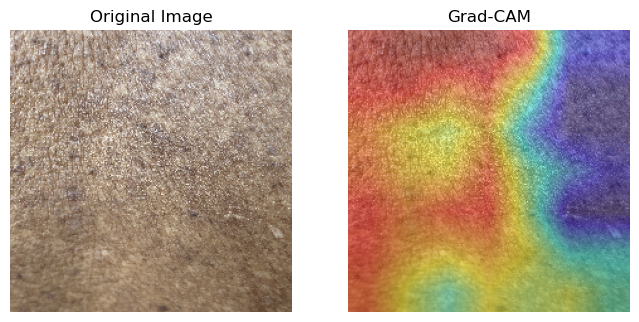

In [143]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Load a test image
img_path = r'C:\Users\Nafesh Anam\Downloads\CSE465_Project\basedata\testing\infacted\IMG_1902.JPG' 
img = tf.keras.utils.load_img(img_path, target_size=(200, 200))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # normalize if your model was trained on normalized images

# Create a model that maps the input image to the activations of the last conv layer + output
last_conv_layer_name = 'conv5_block3_3_conv'  # replace with your last conv layer name (can be found via model.summary())
grad_model = Model(
    inputs=model.input,
    outputs=[model.get_layer(last_conv_layer_name).output, model.output]
)

# Step 3: Compute the gradient of the class score w.r.t. the feature map
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    pred_index = tf.argmax(predictions[0])
    class_channel = predictions[:, pred_index]

# Step 4: Get gradients of the last conv layer
grads = tape.gradient(class_channel, conv_outputs)

# Step 5: Compute the guided weights
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

# Step 6: Multiply weights with feature map outputs
conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Step 7: Normalize the heatmap
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Step 8: Overlay the heatmap on the original image
img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap_color, 0.4, 0)

# Step 9: Show result
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM")
plt.axis('off')
plt.show()
